In [52]:
#Importando a biblioteca Pandas:

import pandas as pd

In [53]:
#Abrindo arquivo em local diferente do editor:

#path = "/Users/myhouse/Documents/01 - Estudos/06 - Data Science ALURA/datasets/notas_filmes/ratings.csv"
#open(path).readline()

notas = pd.read_csv("/Users/myhouse/Documents/01 - Estudos/06 - Data Science ALURA/datasets/notas_filmes/ratings.csv")

In [54]:
#Cabeçalho e os primeiros 05 elementos da tabela:

notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [55]:
#Formato da tabela: (número de avaliações, numero de colunas)

notas.shape

(100836, 4)

In [56]:
#Mudança do cabeçalho:

notas.columns = ["usuarioId", "filmeId", "nota", "momento"]
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [57]:
#Verificando todos os valores da coluna "nota":
#A saída será uma serie de dados:

notas["nota"]

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: nota, Length: 100836, dtype: float64

In [58]:
#Imprimindo valores únicos da serie (agrupa os valores repetidos):

notas["nota"].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [59]:
#Contagem dos valores repetidos:
#Saída ordenada no maior para o maior

notas["nota"].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

In [60]:
#Média das notas:

notas["nota"].mean()

3.501556983616962

<AxesSubplot:ylabel='Frequency'>

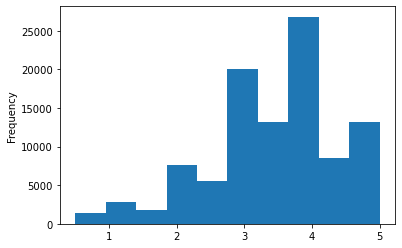

In [61]:
#Explorar de naneira visual (plotar):
#Tipo histograma para melhor visualização: kind="hist"

notas["nota"].plot(kind="hist")



In [62]:
#Mediana das notas (Divide na metade do quantitativo de notas):

notas["nota"].median()

3.5

In [63]:
#Mostrar a descrição completa dos dados a serem analisados:
#Note que a médiana representa 50% do total.

notas["nota"].describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

In [64]:
#Para melhor visualização utilizar a biblioteca Seaborn:

import seaborn as sns

C:\Users\myhouse\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='nota'>

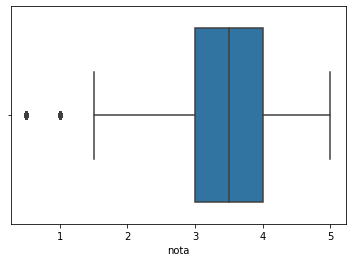

In [67]:
#Plotando o boxplot para visualisar o ".discribe()"

sns.boxplot(notas["nota"])

In [68]:
#Abrindo o arquivo "movies" para analise:

filmes = pd.read_csv("/Users/myhouse/Documents/01 - Estudos/06 - Data Science ALURA/datasets/notas_filmes/movies.csv")

In [69]:
filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [71]:
#Mudando o cabeçalho

filmes.columns = ["filmeId", "titulo", "generos"]

In [72]:
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [73]:
#Verificar a identidade de cada filme nas duas tabelas e atribuir um ao outro (Id)
#Saída: Mostra a coluna filmeId que possui o valor 1 (Toy Story (1995)):

notas.query("filmeId==1")

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483
...,...,...,...,...
97364,606,1,2.5,1349082950
98479,607,1,4.0,964744033
98666,608,1,2.5,1117408267
99497,609,1,3.0,847221025


In [76]:
#Mostrando somente as notas do filmeId 1:

notas.query("filmeId==1")["nota"]

0        4.0
516      4.0
874      4.5
1434     2.5
1667     4.5
        ... 
97364    2.5
98479    4.0
98666    2.5
99497    3.0
99534    5.0
Name: nota, Length: 215, dtype: float64

In [77]:
#Tirando a média das notas do filmeId 1:

notas.query("filmeId==1")["nota"].mean()

3.9209302325581397

In [79]:
#Tirar média de todas as notas:
#Agrupar pela coluna filmeId:

notas.groupby("filmeId").mean()

,usuarioId,nota,momento
filmeId,,,
1,306.530233,3.920930,1.129835e+09
2,329.554545,3.431818,1.135805e+09
3,283.596154,3.259615,1.005110e+09
4,219.857143,2.357143,8.985789e+08
5,299.571429,3.071429,9.926643e+08
...,...,...,...
193581,184.000000,4.000000,1.537109e+09
193583,184.000000,3.500000,1.537110e+09
193585,184.000000,3.500000,1.537110e+09


In [85]:
#Extrair somente as colunas que necessitamos:
#Agrupar por colunas:

media_por_filme = notas.groupby("filmeId").mean()["nota"]
media_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

<AxesSubplot:ylabel='Frequency'>

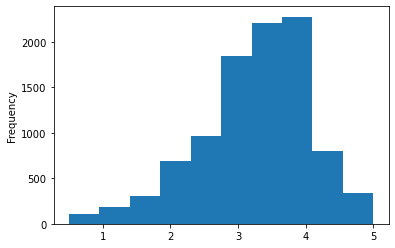

In [89]:
#Plotando o histograma das médias por filme:

media_por_filme.plot(kind="hist")

C:\Users\myhouse\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='nota'>

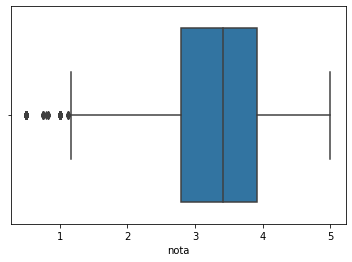

In [91]:
#Plotando o boxplot das médias por filme:

sns.boxplot(media_por_filme)

In [92]:
media_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

C:\Users\myhouse\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='nota', ylabel='Density'>

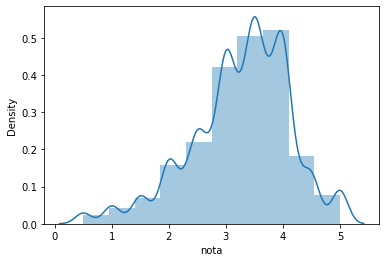

In [98]:
#Histograma no seaborn:
# "bins" refere-se ao numero de caixas no histograma (detalhamento da visualização, modifique o numero para ver a mudança)
# "bins" por default utiliza um ajuste automático de acordo com os dados.

sns.distplot(media_por_filme, bins=10)

Text(0.5, 1.0, 'Histograma das Médias dos Filmes')

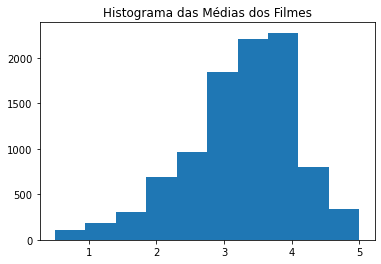

In [102]:
#Utilizando a biblioteca matplotlib de baixo nivel (Sem usar biblioteca extra):

import matplotlib.pyplot as plt

plt.hist(media_por_filme)
plt.title("Histograma das Médias dos Filmes")

C:\Users\myhouse\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Histograma das Médias dos Filmes'}, xlabel='nota', ylabel='Density'>

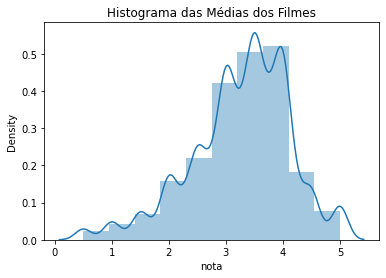

In [103]:
#Pode-se utilizar funções do matplotlib no seaborn.

plt.title("Histograma das Médias dos Filmes")
sns.distplot(media_por_filme, bins=10)

In [106]:
#Importando nova base de dados - TMDB 5000 (5000 filmes):

tmdb = pd.read_csv("/Users/myhouse/Documents/01 - Estudos/06 - Data Science ALURA/datasets/tmdb5000/tmdb_5000_movies.csv")
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [107]:
#Analisando os filems pela lingua orginal:
# Variavel categorica nominal = Não existe diferença de tamanhos de uma lingua e outra e não pode-se utilizar mais de uma no mesmo momento.

tmdb["original_language"].unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [ ]:
# Variavel categorica ordinal: 
#Colégio: Primeiro Grau -> Segundo Grau -> Terceiro Grau

In [ ]:
# Variavel quantitativa continuo: 
#Valores de orçamento

In [110]:
#Contando a quantidade de vezes que parecem:

tmdb["original_language"].value_counts()

en    4505
fr      70
es      32
de      27
zh      27
hi      19
ja      16
it      14
cn      12
ko      11
ru      11
pt       9
da       7
sv       5
fa       4
nl       4
he       3
th       3
ta       2
id       2
ro       2
ar       2
cs       2
vi       1
te       1
is       1
hu       1
tr       1
pl       1
nb       1
ps       1
sl       1
no       1
el       1
af       1
ky       1
xx       1
Name: original_language, dtype: int64

In [111]:
#Transformando a lista em data frame, no caso a lingua vira o indice:

tmdb["original_language"].value_counts().to_frame()

,original_language
en,4505
fr,70
es,32
de,27
zh,27
hi,19
ja,16
it,14
cn,12
ko,11


In [112]:
#Transformando a lista em data frame, com a lingua em colunas:

tmdb["original_language"].value_counts().to_frame().reset_index()

,index,original_language
0,en,4505
1,fr,70
2,es,32
3,de,27
4,zh,27
5,hi,19
6,ja,16
7,it,14
8,cn,12
9,ko,11


In [117]:
#Renomeando as colunas:

contagem_de_lingua = tmdb["original_language"].value_counts().to_frame().reset_index()
contagem_de_lingua.columns = ["original_language", "total"]
contagem_de_lingua.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,de,27
4,zh,27


<AxesSubplot:xlabel='original_language', ylabel='total'>

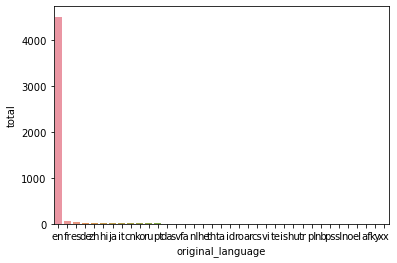

In [119]:
#Para plotar pesquisar o tipo de categoria para seus dados e assim buscar o melhor gráfico:
#Transformando a lista em dataframe temos a possibilidade de indicar os eixos e o dataset.

sns.barplot(x="original_language", y="total", data = contagem_de_lingua)

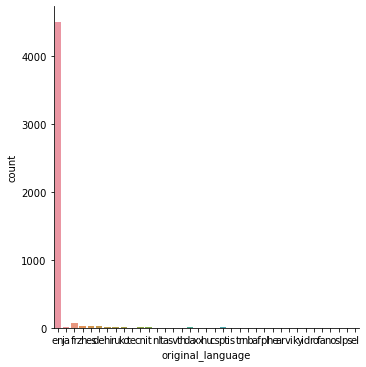

In [120]:
# Plotagem de graficos alta categoria (mais genericos):
# kind="count" tipo dos dados - contar quantas vezes aparece

sns.catplot(x="original_language", kind="count", data = tmdb)

In [125]:
#Tratamento dos dados para melhor visualização:
#Comparando a lingua "en" com todas as outras:

total_por_lingua = tmdb["original_language"].value_counts()
total_geral = total_por_lingua.sum() #soma todos os valores
total_de_ingles = total_por_lingua.loc["en"] # ".loc" filtra somente a coluna que indicar
total_do_resto = total_geral - total_de_ingles
print(total_de_ingles, total_do_resto)

4505 298


In [130]:
#Para plotar o grafico precisamos de passar os valores para um dicionario (mapa):

dados = {
    "lingua":["Ingles", "Outros"],
    "total":[total_de_ingles, total_do_resto]
}

dados

{'lingua': ['Ingles', 'Outros'], 'total': [4505, 298]}

In [131]:
#Crie um dataframe encima da lista criada:

pd.DataFrame(dados)
dados = pd.DataFrame(dados)
dados

,lingua,total
0,Ingles,4505
1,Outros,298


<AxesSubplot:xlabel='lingua', ylabel='total'>

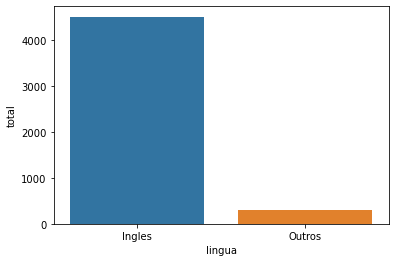

In [132]:
#Plotando um grafico encima do dataframe criado:

sns.barplot(x="lingua", y="total", data = dados)

([<matplotlib.patches.Wedge at 0x1d68f337e50>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'Ingles'),
  Text(1.0791697511565306, -0.2130555049482467, 'Outros')])

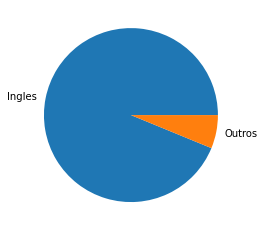

In [133]:
# Utilizando outros graficos: (pizza, não usual)

plt.pie(dados["total"], labels = dados["lingua"])

In [173]:
# Analisando somente os filmes com linguas diferentes de "en":
# Fazer uma "query" pegando somente os filmes diferentes de 'en'
filme_sem_lingua_original_em_ingles = tmdb.query("original_language != 'en'")
filme_sem_lingua_original_em_ingles.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
97,15000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",NaN,315011,"[{""id"": 1299, ""name"": ""monster""}, {""id"": 7671,...",ja,シン・ゴジラ,From the mind behind Evangelion comes a hit la...,9.476999,"[{""name"": ""Cine Bazar"", ""id"": 5896}, {""name"": ...","[{""iso_3166_1"": ""JP"", ""name"": ""Japan""}]",2016-07-29,77000000,120.0,"[{""iso_639_1"": ""it"", ""name"": ""Italiano""}, {""is...",Released,A god incarnate. A city doomed.,Shin Godzilla,6.5,143
235,97250400,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 12, ""na...",http://www.asterixauxjeuxolympiques.com/index.php,2395,"[{""id"": 271, ""name"": ""competition""}, {""id"": 12...",fr,Astérix aux Jeux Olympiques,Astérix and Obélix have to win the Olympic Gam...,20.344364,"[{""name"": ""Constantin Film"", ""id"": 47}, {""name...","[{""iso_3166_1"": ""BE"", ""name"": ""Belgium""}, {""is...",2008-01-13,132900000,116.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,NaN,Asterix at the Olympic Games,5.0,471
317,94000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 36, ""name...",http://www.theflowersofwarmovie.com/,76758,"[{""id"": 173251, ""name"": ""forced prostitution""}...",zh,金陵十三釵,A Westerner finds refuge with a group of women...,12.516546,"[{""name"": ""Beijing New Picture Film Co. Ltd."",...","[{""iso_3166_1"": ""CN"", ""name"": ""China""}, {""iso_...",2011-12-15,95311434,145.0,"[{""iso_639_1"": ""zh"", ""name"": ""\u666e\u901a\u8b...",Released,NaN,The Flowers of War,7.1,187
474,0,"[{""id"": 9648, ""name"": ""Mystery""}, {""id"": 18, ""...",NaN,330770,"[{""id"": 428, ""name"": ""nurse""}, {""id"": 658, ""na...",fr,Évolution,11-year-old Nicolas lives with his mother in a...,3.300061,"[{""name"": ""Ex Nihilo"", ""id"": 3307}, {""name"": ""...","[{""iso_3166_1"": ""BE"", ""name"": ""Belgium""}, {""is...",2015-09-14,0,81.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""}]",Released,NaN,Evolution,6.4,47
492,8000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 16, ""nam...",NaN,293644,"[{""id"": 209714, ""name"": ""3d""}]",es,Don Gato: El inicio de la pandilla,Top Cat has arrived to charm his way into your...,0.719996,"[{""name"": ""Anima Estudios"", ""id"": 9965}, {""nam...","[{""iso_3166_1"": ""IN"", ""name"": ""India""}, {""iso_...",2015-10-30,0,89.0,[],Released,NaN,Top Cat Begins,5.3,9


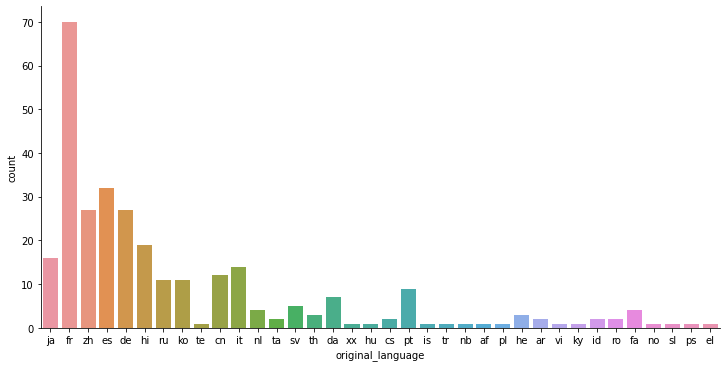

In [170]:
# Plotando em um gráfico de categoria:
# kind = "count" - Evita a necessidade de contagem por meio de formulas (generalista)

sns.catplot(x = "original_language", kind = "count", data = filme_sem_lingua_original_em_ingles, height = 5, aspect = 2) # "aspect" refere-se a largura do eixo x e "height" ao y

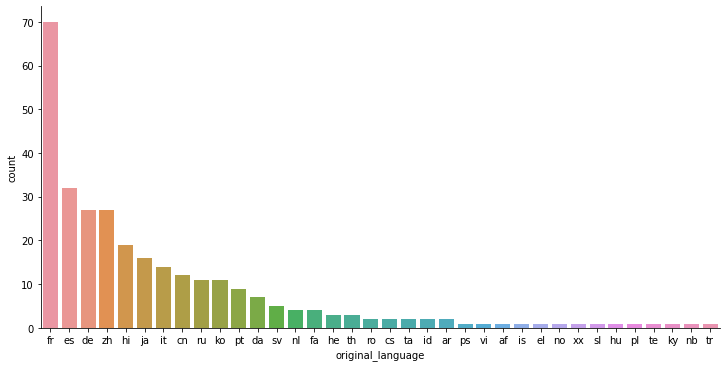

In [199]:
#Plotando o gráfico:
sns.catplot(x = "original_language", kind = "count", 
            data = filme_sem_lingua_original_em_ingles, height = 5, aspect = 2, order = total_por_lingua_de_outros_filmes.index )

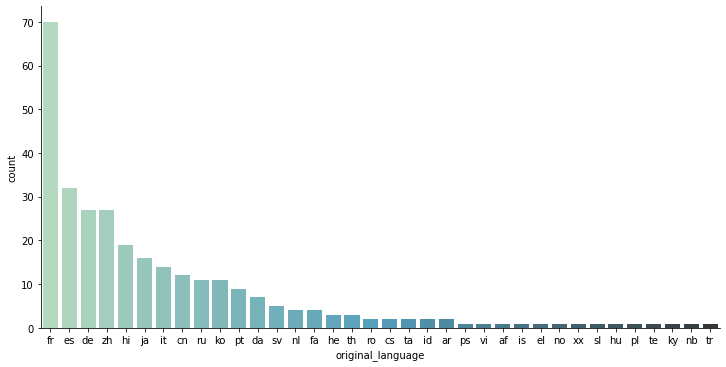

In [200]:
#Ordenando o grafico pelo quantitativo do maior para o menor.
#Ordenando os valores:
total_por_lingua_de_outros_filmes = tmdb.query("original_language != 'en'").original_language.value_counts() 

#Mudando a plalette de cores do gráfico:  palette = "GnBu_d" -> Tipo da cor pesquisar na documentação.

sns.catplot(x = "original_language", 
            kind = "count", 
            data = filme_sem_lingua_original_em_ingles, 
            height = 5, 
            aspect = 2, 
            order = total_por_lingua_de_outros_filmes.index,
            palette = "GnBu_d")


In [201]:
filmes.head(2)

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


<AxesSubplot:xlabel='filmeId', ylabel='nota'>

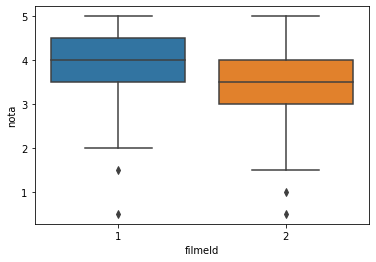

In [202]:
# Plotando a distribuição de notas entre dois filmes (Toy Story e Jumanji):
# data = notas.query("filmeId in [1,2]") seleciona o Id a ser mostrado

sns.boxplot(x ="filmeId", y = "nota", data = notas.query("filmeId in [1,2]"))

In [203]:
# Desvio Padrão:
#Importar a biblioteca numpy:

import numpy as np

# np.std Desvio padrão

np.std(media_por_filme)

0.8698289051582987